In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions
k = 10 

# Initialize action values with zero mean and unit variance
action_values = np.random.normal(0, 1, k)

action_values

array([-0.72736821, -1.84095455, -0.08916463, -1.07029921,  0.22066915,
       -1.33807551, -1.00702207, -1.31887693, -0.17367283,  0.00520553])

In [2]:
np.mean(action_values)

-0.7339559262228958

In [3]:
# Adjust action values so as to ensure they have zero mean
action_values-=np.mean(action_values)
action_values

array([ 0.00658771, -1.10699862,  0.6447913 , -0.33634328,  0.95462508,
       -0.60411958, -0.27306615, -0.58492101,  0.56028309,  0.73916145])

In [4]:
np.mean(action_values)

1.1102230246251566e-17

In [5]:
# Generate rewards for each action based on action values
rewards = {action: np.random.normal(value, 1, 100) for action, value in enumerate(action_values)}
rewards

{0: array([ 0.03005757, -0.66044057,  0.54149285,  0.39551201,  1.91117244,
         1.54882557, -1.06468262, -0.45614336, -1.05355292,  0.2061167 ,
         0.00865951,  0.72905531, -0.9569373 ,  0.33855418,  0.11446735,
        -0.56424218, -1.40490438, -0.30147821,  1.12383177,  1.30335376,
         0.21574507, -0.24798643,  0.72527199,  0.28670995,  0.47288584,
        -0.70577219,  1.36558452, -2.93000773, -0.42849066, -1.76789446,
         0.18753397, -0.68535033,  1.05973765,  0.11130385, -0.7373902 ,
         0.07940579, -0.38690523, -1.6887261 ,  1.70203227, -0.34791739,
        -0.73251114,  0.86538224, -0.60237062,  0.37681912,  0.80976242,
         0.12029016, -1.31714376,  0.4033003 , -0.4718917 ,  0.32043457,
         0.7909985 , -1.72486335, -1.81137032,  1.71791371, -1.29324044,
         0.97775624,  0.58616454, -0.24175728,  0.0908783 , -0.44095587,
         1.09102331, -0.71914815,  0.26701372, -1.64613168, -2.77480265,
         0.76875152,  0.16087039, -0.81530589,  

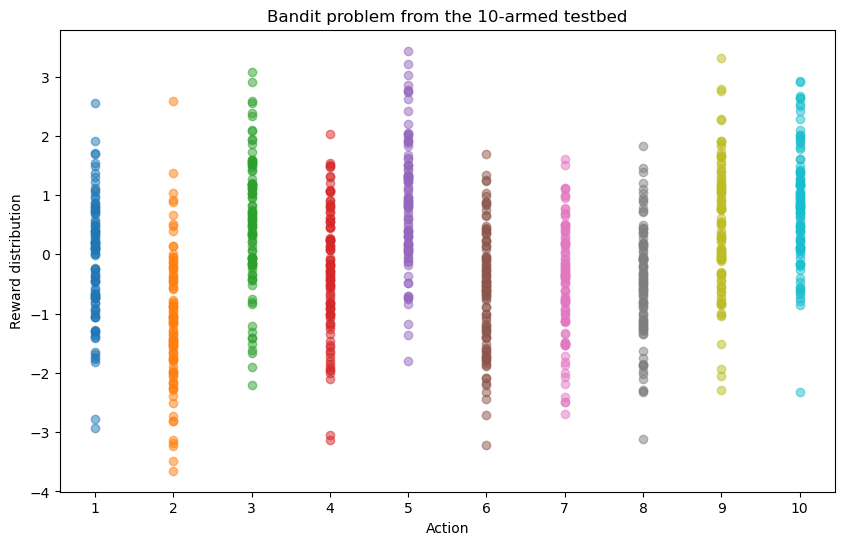

In [6]:
plt.figure(figsize=(10, 6))

# scatter plot for each action's reward distribution
for i in range(k):
    data = rewards[i]
    
    plt.scatter([i+1]*len(data), data, alpha=0.5)

plt.xticks(range(1, k+1))
plt.xlabel('Action')
plt.ylabel('Reward distribution')
plt.title('Bandit problem from the 10-armed testbed')
plt.show()


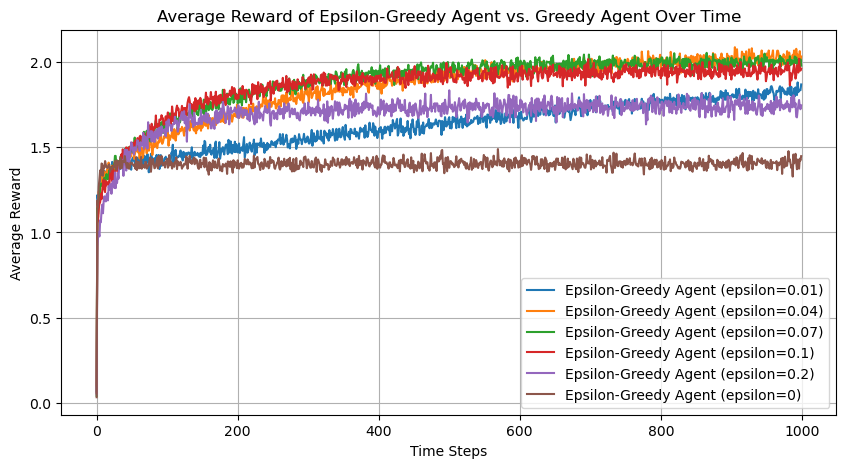

In [7]:
# Initialize action values and counts
Q = np.zeros(k)
N = np.zeros(k)

# Exploration rates
epsilons = [0.01, 0.04, 0.07, 0.1, 0.2,0]

# Number of time steps and episodes
time_steps = 1000
episodes = 2000

# Placeholder for average rewards of epsilon-greedy agent and best possible action
avg_rewards = {epsilon: np.zeros(time_steps) for epsilon in epsilons}
#avg_rewards_best = np.zeros(time_steps)

for epsilon in epsilons:
    for episode in range(episodes):
        # Initialize action values and counts
        Q = np.zeros(k)
        N = np.zeros(k)
        
        for t in range(time_steps):
            # Reward from the reward distribution
            R = np.random.choice(rewards[A])
            
            # Update the count of actions
            N[A] += 1

            # Update the estimated value of the chosen action
            Q[A] += (R - Q[A]) / N[A]

            # Update the average rewards
            avg_rewards[epsilon][t] += R
            #avg_rewards_best[t] += np.max(Q)
            
            # Choose next action
            if np.random.rand() < epsilon:
                A = np.random.choice(k)  # Explore
            else:
                A = np.argmax(Q)  # Exploit
 # Average rewards over all episodes
for epsilon in epsilons:
    avg_rewards[epsilon] /= episodes
#avg_rewards_best /= episodes   

# Average rewards over time
plt.figure(figsize=(10,5))  # Increase figure size
for epsilon in epsilons:
    plt.plot(avg_rewards[epsilon], label=f'Epsilon-Greedy Agent (epsilon={epsilon})')  # Increase line width and adjust alpha
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.grid(True)  # Add gridlines
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent vs. Greedy Agent Over Time')
plt.show()



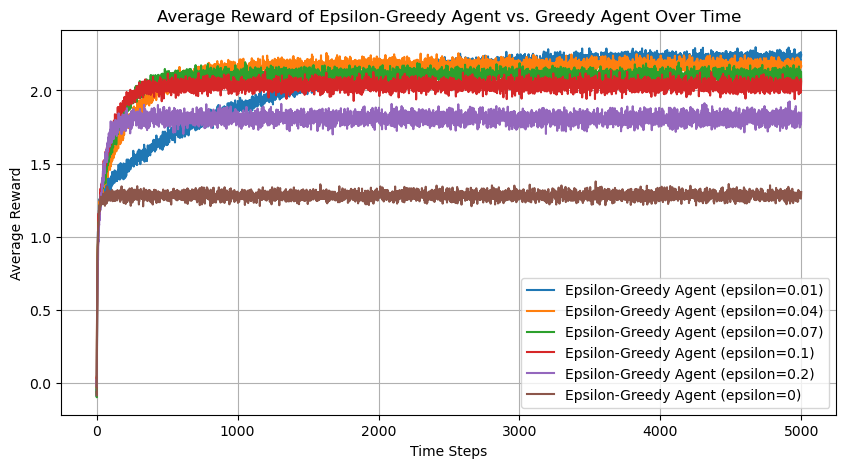

In [7]:
# Initialize action values and counts
Q = np.zeros(k)
N = np.zeros(k)

# Exploration rates
epsilons = [0.01, 0.04, 0.07, 0.1, 0.2,0]

# Number of time steps and episodes
time_steps = 5000
episodes = 2000

# Placeholder for average rewards of epsilon-greedy agent and best possible action
avg_rewards = {epsilon: np.zeros(time_steps) for epsilon in epsilons}
#avg_rewards_best = np.zeros(time_steps)

for epsilon in epsilons:
    for episode in range(episodes):
        # Initialize action values and counts
        Q = np.zeros(k)
        N = np.zeros(k)
        # choose random action
        A = np.random.choice(k)
        for t in range(time_steps):
            # Reward from the reward distribution
            R = np.random.choice(rewards[A])
            
            # Update the count of actions
            N[A] += 1

            # Update the estimated value of the chosen action
            Q[A] += (R - Q[A]) / N[A]

            # Update the average rewards
            avg_rewards[epsilon][t] += R
            #avg_rewards_best[t] += np.max(Q)
            
            # Choose next action
            if np.random.rand() < epsilon:
                A = np.random.choice(k)  # Explore
            else:
                A = np.argmax(Q)  # Exploit
 # Average rewards over all episodes
for epsilon in epsilons:
    avg_rewards[epsilon] /= episodes
#avg_rewards_best /= episodes   

# Average rewards over time
plt.figure(figsize=(10,5))  # Increase figure size
for epsilon in epsilons:
    plt.plot(avg_rewards[epsilon], label=f'Epsilon-Greedy Agent (epsilon={epsilon})')  # Increase line width and adjust alpha
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.grid(True)  # Add gridlines
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent vs. Greedy Agent Over Time')
plt.show()

In [8]:
# # Initialize action values and counts
# Q = np.zeros(k)
# N = np.zeros(k)

# # Exploration rate
# epsilon = 0.1

# # Number of time steps and episodes
# time_steps = 1000
# episodes = 2000

# # Placeholder for average rewards of epsilon-greedy agent and best possible action
# avg_rewards_epsilon = np.zeros(time_steps)
# avg_rewards_best = np.zeros(time_steps)

# for episode in range(episodes):
#     # Initialize action values and counts
#     Q = np.zeros(k)
#     N = np.zeros(k)
#     # choose random action
#     A = np.random.choice(k)
#     for t in range(time_steps):
#         # Reward from the reward distribution
#         R = np.random.choice(rewards[A])
        
#         # Update the count of actions
#         N[A] += 1

#         # Update the estimated value of the chosen action
#         Q[A] += (R - Q[A]) / N[A]

#         # Update the average rewards
#         avg_rewards_epsilon[t] += R
#         avg_rewards_best[t] += np.max(Q)
        
#         # Choose next action
#         if np.random.rand() < epsilon:
#             A = np.random.choice([i for i in range(0,k-1) if i not in [A]])  # Explore
#         else:
#             A = np.argmax(Q)  # Exploit
# # Average rewards over all episodes
# avg_rewards_epsilon /= episodes
# avg_rewards_best /= episodes   
      
# # Average rewards over time
# plt.figure(figsize=(10, 5))
# plt.plot(avg_rewards_epsilon, label='Epsilon-Greedy Agent')
# plt.plot(avg_rewards_best, label='Best Possible Action')
# plt.xlabel('Time Steps')
# plt.ylabel('Average Reward')
# plt.legend()
# plt.title('Average Reward of Epsilon-Greedy Agent vs. Best Possible Action Over Time')
# plt.show()    

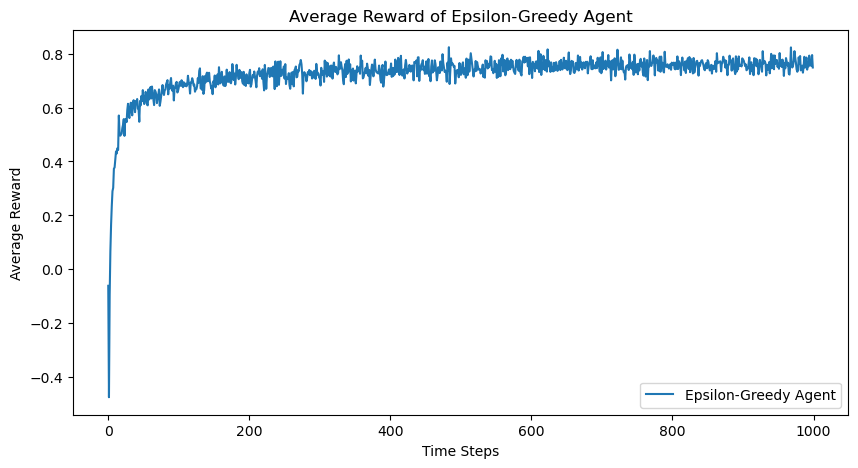

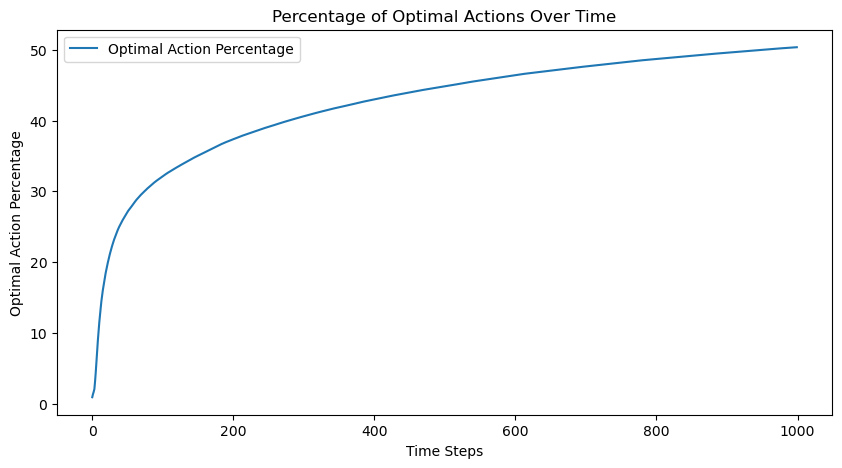

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions
k = 10


# Initialize action values and counts
Q = np.zeros(k)
N = np.zeros(k)

# Exploration rate
epsilon = 0.1

# Number of time steps and episodes
time_steps = 1000
episodes = 2000

# Placeholder for average rewards of epsilon-greedy agent and best possible action
avg_rewards_epsilon = np.zeros(time_steps)

# Placeholder for optimal action ratio
optimal_action_ratio = np.zeros(time_steps)

for episode in range(episodes):
    # Initialize action values and counts
    Q = np.zeros(k)
    N = np.zeros(k)
    
    # Identify the optimal action based on the true reward distributions
    true_Q = [np.mean(rewards[i]) for i in range(k)]
    optimal_action = np.argmax(true_Q)
    
    ttl_optim_acts = 0
    
    for t in range(time_steps):
        # Choose next action
        if np.random.rand() < epsilon:
            A = np.random.choice(k)  # Explore
        else:
            A = np.argmax(Q)  # Exploit

        # Reward from the reward distribution
        R = np.random.choice(rewards[A])
        
        # Update the count of actions
        N[A] += 1

        # Update the estimated value of the chosen action
        Q[A] += (R - Q[A]) / N[A]

        # Update the average rewards
        avg_rewards_epsilon[t] += R
        
        # Check if the chosen action is optimal
        if A == optimal_action:
            ttl_optim_acts += 1

        # Update the optimal action ratio
        optimal_action_ratio[t] += ttl_optim_acts / (t + 1)

# Average rewards over all episodes
avg_rewards_epsilon /= episodes

# Average optimal action ratio over all episodes
optimal_action_ratio /= episodes

# Average rewards over time
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards_epsilon, label='Epsilon-Greedy Agent')
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent')
plt.show()

# Optimal action ratio over time
plt.figure(figsize=(10, 5))
plt.plot(optimal_action_ratio * 100, label='Optimal Action Percentage')
plt.xlabel('Time Steps')
plt.ylabel('Optimal Action Percentage')
plt.legend()
plt.title('Percentage of Optimal Actions Over Time')
plt.show()
